In [2]:
from openbabel import openbabel

In [3]:
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [5]:
def split(word):
    return[char for char in word]

In [6]:
def combine(filepath1, filepath2):
    df1 = pd.read_csv(filepath1, sep='\t')
    df2 = pd.read_csv(filepath2, sep='\t')
    df_final = pd.concat([df1, df2], ignore_index=True, sort=True)
    return(df_final)

In [7]:
def Inchisortbygen(df):
    sorted_status = False
    while sorted_status == False:
        counter = 0
        for i in range(1, len(df['Generation'])):
            current_value = (split(df['Generation'][i]))[-1]
            previous_value = (split(df['Generation'][i-1]))[-1]
            if current_value < previous_value:
                temp_inchi_low = df['Inchi'][i]
                temp_inchi_high = df['Inchi'][i-1]
                df['Inchi'][i] = temp_inchi_high
                df['Inchi'][i-1] = temp_inchi_low
                
                temp_gen_low = df['Generation'][i]
                temp_gen_high = df['Generation'][i-1]
                df['Generation'][i] = temp_gen_high
                df['Generation'][i-1] = temp_gen_low
                
                temp_smiles_low = df['Smiles'][i]
                temp_smiles_high = df['Smiles'][i-1]
                df['Smiles'][i] = temp_smiles_high
                df['Smiles'][i-1] = temp_smiles_low
                
                counter += 1
        if counter == 0:
            sorted_status = True
    return(df)

In [8]:
#NoStereoFormoseAmm = combine('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm_CHNO.tsv', './MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm_CHO.tsv')

In [9]:
#%%time
#NoStereoFormoseAmm = Inchisortbygen(NoStereoFormoseAmm)

In [10]:
#NoStereoFormoseAmm.to_csv(r'NoStereoFormoseAmm.tsv', header=None, index=None, sep='\t', mode='a') 

In [11]:
#NoStereoGlucoseAmm = combine('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm_CHNO.tsv', './MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm_CHO.tsv')

In [12]:
#%%time
#NoStereoGlucoseAmm = Inchisortbygen(NoStereoGlucoseAmm)

In [13]:
#NoStereoGlucoseAmm.to_csv(r'NoStereoGlucoseAmm.tsv', header=None, index=None, sep='\t', mode='a') 

## Matches vs Generations

In [14]:
def generations_counter(input_data, num_generations):
    gen_data = np.zeros(num_generations+1)
    value_data = np.zeros(num_generations+1)
    
    for i in range(len(gen_data)):
        gen_data[i] = i
        
    for i in range(len(input_data['Generation'])):
        dummy = split(input_data['Generation'][i])
        value = int(dummy[-1])
        value_data[value]+=1
    
    final_value_data = np.zeros(num_generations+1)
    for i in range(1, len(value_data)):
        final_value_data[i] += value_data[i]
        for j in range(i):
            final_value_data[i] += value_data[j]
    
    return(gen_data, final_value_data)

In [15]:
def generations_plot(input_data, num_generations):
    input_data = pd.read_csv(input_data, sep='\t')
    gen_data, final_value_data = generations_counter(input_data, num_generations)
    plt.plot(gen_data, final_value_data, linestyle='--', marker='o')

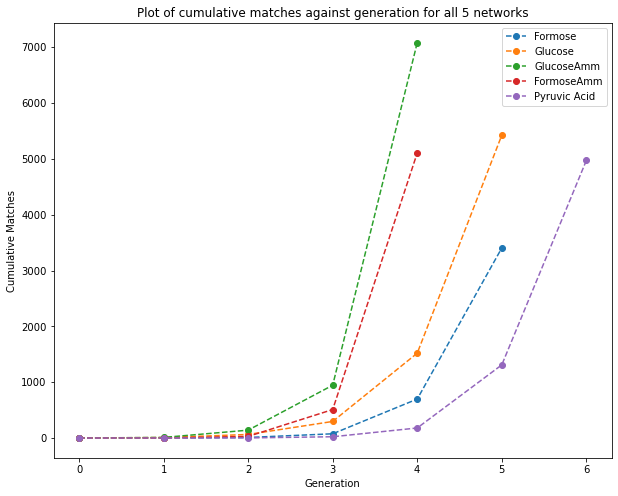

In [16]:
plt.figure(figsize = (10,8))

generations_plot('./MatchedDataNoStereo/FormoseFinal/NoStereoFormoseFinal_CHNO.tsv', 5)
generations_plot('./MatchedDataNoStereo/GlucoseFinal/NoStereoGlucoseFinal_CHNO.tsv', 5)
generations_plot('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm.tsv', 4)
generations_plot('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm.tsv', 4)
generations_plot('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv', 6)

plt.xlabel('Generation')
plt.ylabel('Cumulative Matches')
plt.title('Plot of cumulative matches against generation for all 5 networks')
plt.legend(['Formose','Glucose','GlucoseAmm','FormoseAmm','Pyruvic Acid'])

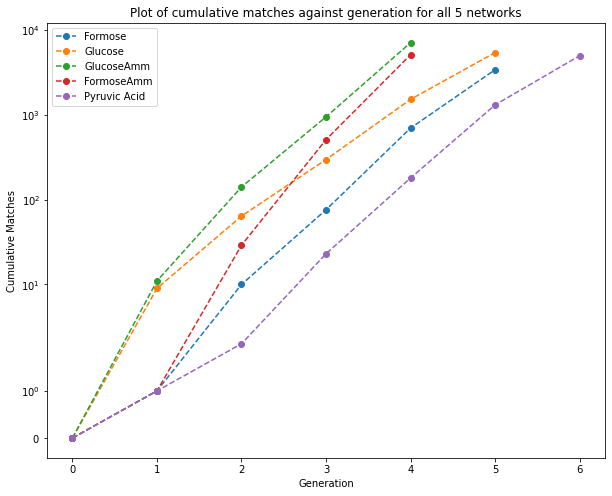

In [17]:
plt.figure(figsize = (10,8))

generations_plot('./MatchedDataNoStereo/FormoseFinal/NoStereoFormoseFinal_CHNO.tsv', 5)
generations_plot('./MatchedDataNoStereo/GlucoseFinal/NoStereoGlucoseFinal_CHNO.tsv', 5)
generations_plot('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm.tsv', 4)
generations_plot('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm.tsv', 4)
generations_plot('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv', 6)

plt.xlabel('Generation')
plt.ylabel('Cumulative Matches')
plt.title('Plot of cumulative matches against generation for all 5 networks')
plt.yscale('symlog')

plt.legend(['Formose','Glucose','GlucoseAmm','FormoseAmm','Pyruvic Acid'])

In [18]:
def generations_subplot(input_data, num_generations, row_index, column_index):
        input_data = pd.read_csv(input_data, sep='\t')
        gen_data, final_value_data = generations_counter(input_data, num_generations)
        return(axes[row_index][column_index].plot(gen_data, final_value_data, linestyle='--', marker='o'))

<Figure size 432x288 with 0 Axes>

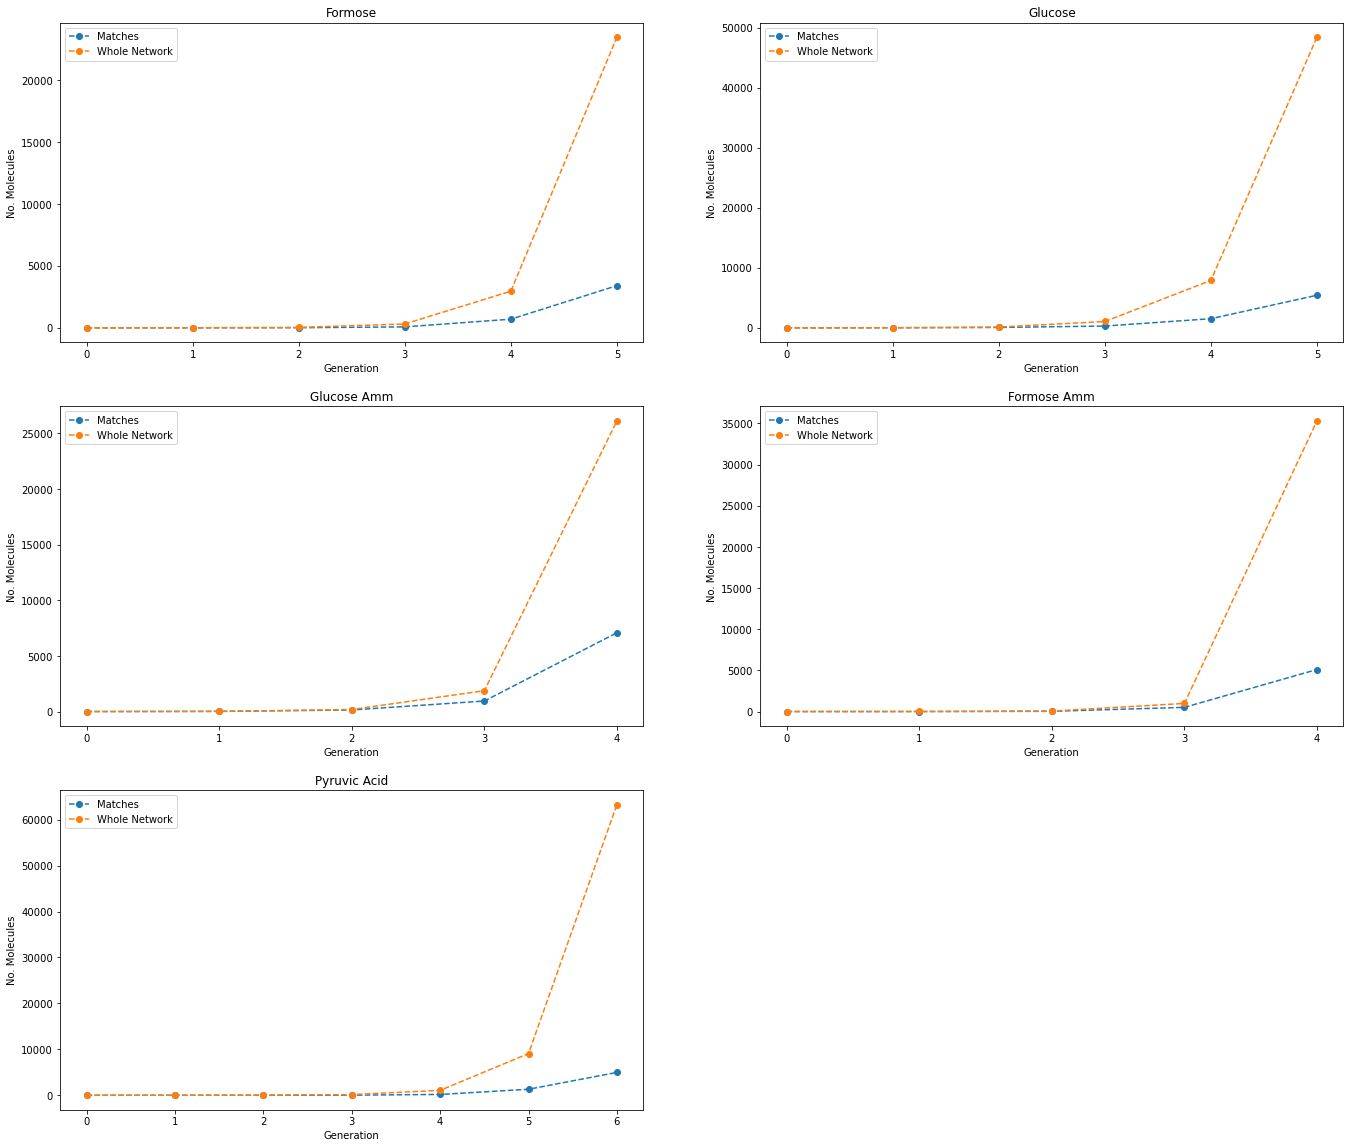

In [19]:
plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (23,20), squeeze=False) 

hplot1 = generations_subplot('./MatchedDataNoStereo/FormoseFinal/NoStereoFormoseFinal_CHNO.tsv', 5, 0, 0)
hplot1 = generations_subplot('./FormoseFinalData/formose_output.tsv', 5, 0, 0)
axes[0][0].set_title('Formose')

hplot2 = generations_subplot('./MatchedDataNoStereo/GlucoseFinal/NoStereoGlucoseFinal_CHNO.tsv', 5, 0, 1)
hplot2 = generations_subplot('./GlucoseFinalData/glucose_degradation_output.tsv', 5, 0, 1)
axes[0][1].set_title('Glucose')

hplot3 = generations_subplot('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm.tsv', 4, 1, 0)
hplot3 = generations_subplot('./GlucoseAmmData/glucose_amm_output.tsv', 4, 1, 0)
axes[1][0].set_title('Glucose Amm')
axes[1][0].set_xticks(np.arange(0, 5, step=1))

hplot4 = generations_subplot('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm.tsv', 4, 1, 1)
hplot4 = generations_subplot('./FormoseAmmData/formose_amm_output.tsv', 4, 1, 1)
axes[1][1].set_title('Formose Amm')
axes[1][1].set_xticks(np.arange(0, 5, step=1))

hplot5 = generations_subplot('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv', 6, 2, 0)
hplot5 = generations_subplot('./PyruvicAcidData/pyruvic_output.tsv', 6, 2, 0)
axes[2][0].set_title('Pyruvic Acid')

for i in range(3):
    for j in range(2):
        axes[i][j].set_xlabel('Generation')
        axes[i][j].set_ylabel('No. Molecules')
        axes[i][j].legend(['Matches', 'Whole Network'])
        #axes[i][j].set_yscale('Log')

fig.delaxes(axes[2,1])

<Figure size 432x288 with 0 Axes>

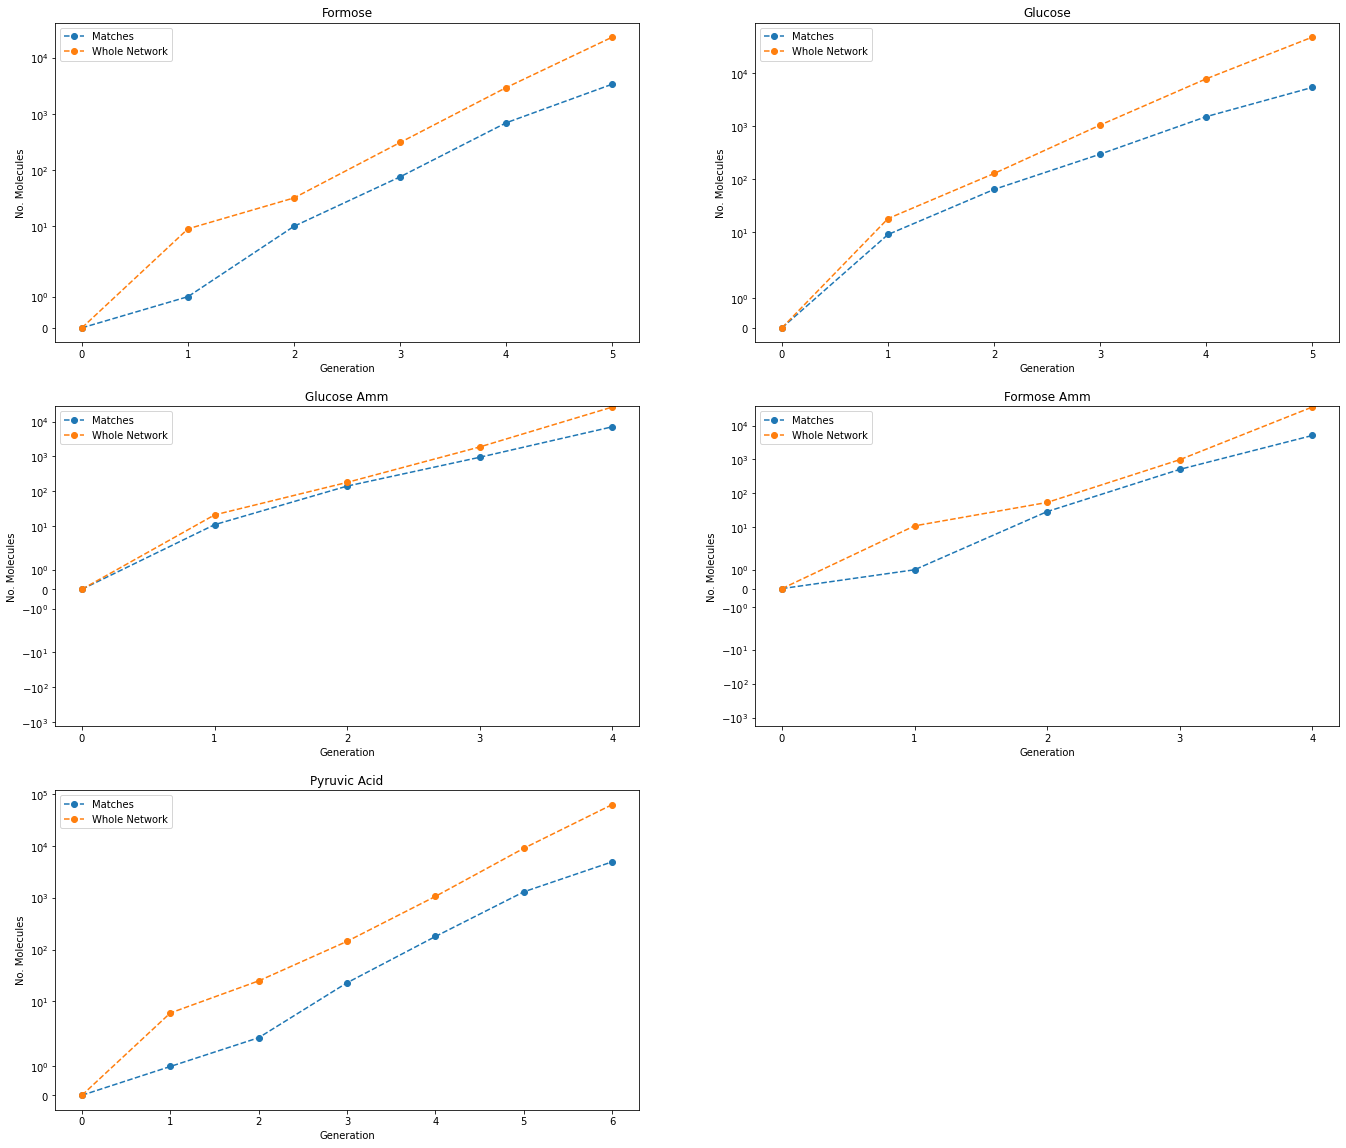

In [20]:
plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (23,20), squeeze=False) 

hplot1 = generations_subplot('./MatchedDataNoStereo/FormoseFinal/NoStereoFormoseFinal_CHNO.tsv', 5, 0, 0)
hplot1 = generations_subplot('./FormoseFinalData/formose_output.tsv', 5, 0, 0)
axes[0][0].set_title('Formose')

hplot2 = generations_subplot('./MatchedDataNoStereo/GlucoseFinal/NoStereoGlucoseFinal_CHNO.tsv', 5, 0, 1)
hplot2 = generations_subplot('./GlucoseFinalData/glucose_degradation_output.tsv', 5, 0, 1)
axes[0][1].set_title('Glucose')

hplot3 = generations_subplot('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm.tsv', 4, 1, 0)
hplot3 = generations_subplot('./GlucoseAmmData/glucose_amm_output.tsv', 4, 1, 0)
axes[1][0].set_title('Glucose Amm')
axes[1][0].set_xticks(np.arange(0, 5, step=1))

hplot4 = generations_subplot('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm.tsv', 4, 1, 1)
hplot4 = generations_subplot('./FormoseAmmData/formose_amm_output.tsv', 4, 1, 1)
axes[1][1].set_title('Formose Amm')
axes[1][1].set_xticks(np.arange(0, 5, step=1))

hplot5 = generations_subplot('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv', 6, 2, 0)
hplot5 = generations_subplot('./PyruvicAcidData/pyruvic_output.tsv', 6, 2, 0)
axes[2][0].set_title('Pyruvic Acid')

for i in range(3):
    for j in range(2):
        axes[i][j].set_xlabel('Generation')
        axes[i][j].set_ylabel('No. Molecules')
        axes[i][j].legend(['Matches', 'Whole Network'])
        axes[i][j].set_yscale('symlog')

fig.delaxes(axes[2,1])

## Mols2Grid Plot

In [21]:
def display(array, descriptions):
    mols = []
    for i in range(len(array)):
        mol = Chem.MolFromSmiles(array[i])
        mols.append(mol)
    return(Draw.MolsToGridImage(mols, maxMols=100, legends = descriptions))

In [23]:
RepresentativeMatches = pd.read_csv('./Figures/DisplayingMatches/MatchesFromEachNetwork.tsv', sep='\t')

In [24]:
Descriptions = ['FormoseAmm G1', 'FormoseAmm G2',
                'FormoseAmm G3', 'FormoseAmm G4', 
                'Formose G1', 'Formose G2',
                'Formose G3', 'Formose G4',
                'Formose G5', 'GlucoseAmm G1',
                'GlucoseAmm G2', 'GlucoseAmm G3', 
                'GlucoseAmm G4', 'Glucose G1',
                'Glucose G2', 'Glucose G3',
                'Glucose G4', 'Glucose G5',
                'Pyruvic Acid G1', 'Pyruvic Acid G2',
                'Pyruvic Acid G3', 'Pyruvic Acid G4',
                'Pyruvic Acid G5', 'Pyruvic Acid G6']

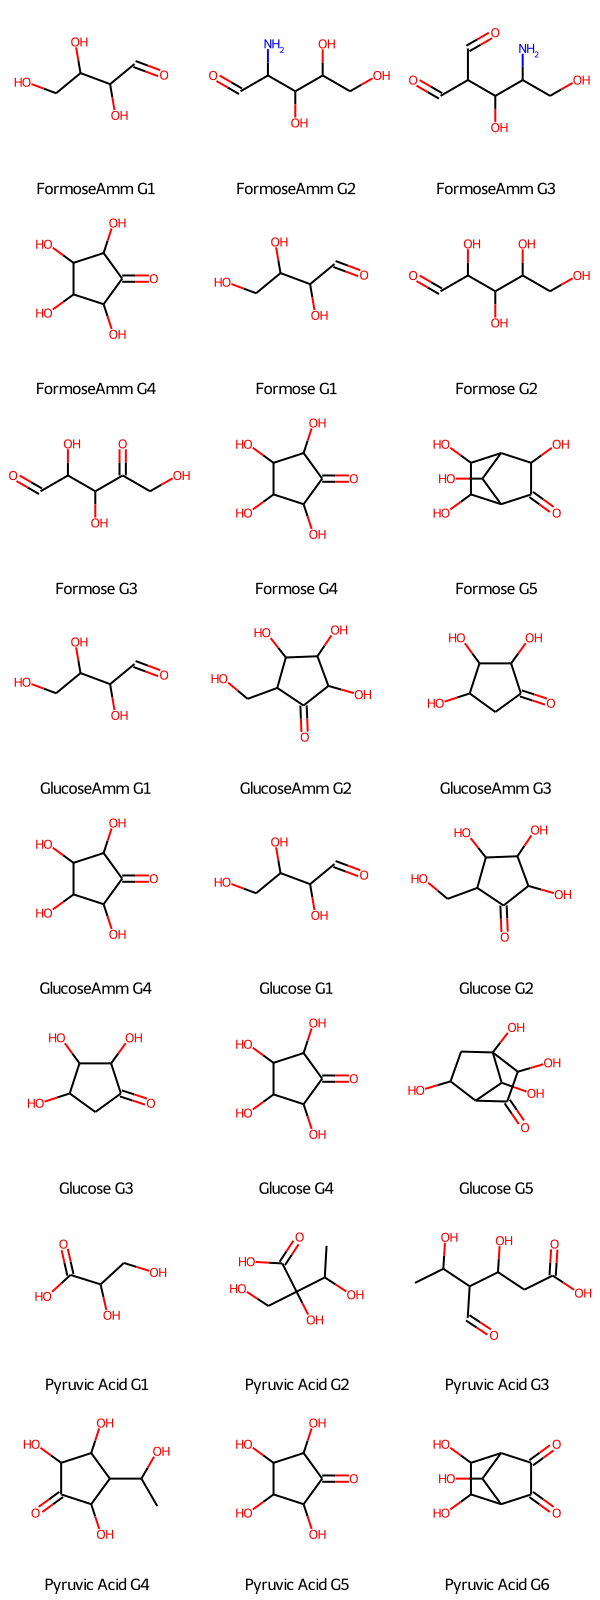

In [25]:
display(RepresentativeMatches['Smiles'], Descriptions)

## Energy Minimisation

In [26]:
from rdkit.Chem import PandasTools

In [27]:
def minimise(matched_data):
    matches = pd.read_csv(matched_data, sep='\t')
    PandasTools.AddMoleculeColumnToFrame(matches,'Smiles','Molecule')
    PandasTools.WriteSDF(matches, 'pp_out.sdf', molColName='Molecule', properties=list(matches.columns))
    !obabel pp_out.sdf -O Minimised.sdf --minimize --ff MMFF94

In [28]:
#%%time
#minimise('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv')

## Extra Descriptor Plots

In [29]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [30]:
def molweight(array, position):
    Smi = array[position]
    mol = Chem.MolFromSmiles(Smi)
    weight = Descriptors.ExactMolWt(mol)
    return(weight)

In [31]:
def molformula(array, position):
    Smi = array[position]
    mol = Chem.MolFromSmiles(Smi)
    molformula = rdMolDescriptors.CalcMolFormula(mol)
    return(molformula)

In [32]:
def mol_traits(matched_data, position):
    matches = pd.read_csv(matched_data, sep='\t')
    matches['Molecular Weight'] = matches.apply(molweight, axis=1, raw=True, result_type='expand', args=[position])
    matches['Molecular Formula'] = matches.apply(molformula, axis=1, raw=True, result_type='expand', args=[position])
    return(matches)

In [33]:
def atom_finder(array, atom):
    elements = ['C', 'H', 'N', 'O']
    molformula = array[4]
    letters = split(molformula)
    dummy = ''
    for i in range(len(letters)):
        if letters[i] == atom:
            if i == len(letters)-1 or letters[i+1] in elements:
                dummy = 1
                break
            else:
                dummy += letters[i+1]
                if i+2 <= len(letters)-1:
                    if letters[i+2] not in elements:
                        dummy += letters[i+2]
    #value = int(dummy)
    return(dummy)

In [34]:
def num_atoms(matches):
    matches['No. Carbons'] = matches.apply(atom_finder, axis=1, raw=True, result_type='expand', args=['C'])
    matches['No. Hydrogens'] = matches.apply(atom_finder, axis=1, raw=True, result_type='expand', args=['H'])
    matches['No. Oxygens'] = matches.apply(atom_finder, axis=1, raw=True, result_type='expand', args=['O'])
    return(matches)

In [35]:
def calc_descriptors(matched_data, position, name):
    matches = mol_traits(matched_data, position)
    matches = num_atoms(matches)
    matches.to_csv(f'{name}Descriptors.tsv', header=None, index=None, sep='\t', mode='a')
    return(matches)

In [36]:
#df = calc_descriptors('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv', 1, 'PyruvicAcid')

In [37]:
file = PandasTools.LoadSDF('./MatchedDataNoStereo/FormoseAmm/MinimisedFormoseAmm.sdf')

## Descriptors Plots

In [38]:
def descriptor_subplot(input_data, descriptor, row_index, column_index):
        data = pd.read_csv(input_data, sep='\t')
        xdata = data['Molecular Weight']
        ydata = data[descriptor]
        return(axes[row_index][column_index].scatter(xdata, ydata))

In [39]:
def descriptor_subplotter(descriptor):
    hplot1 = descriptor_subplot('./MatchedDataNoStereo/FormoseFinal/FormoseFinalDescriptors.tsv', descriptor, 0, 0)
    axes[0][0].set_title('Formose')

    hplot2 = descriptor_subplot('./MatchedDataNoStereo/GlucoseFinal/GlucoseFinalDescriptors.tsv', descriptor, 0, 1)
    axes[0][1].set_title('Glucose')

    hplot3 = descriptor_subplot('./MatchedDataNoStereo/GlucoseAmm/GlucoseAmmDescriptors.tsv', descriptor, 1, 0)
    axes[1][0].set_title('Glucose Amm')
    #axes[1][0].set_xticks(np.arange(100, 200, step=5))
    #axes[1][0].set_yticks(np.arange(1, 10, step=1))

    hplot4 = descriptor_subplot('./MatchedDataNoStereo/FormoseAmm/FormoseAmmDescriptors.tsv', descriptor, 1, 1)
    axes[1][1].set_title('Formose Amm')
    #axes[1][1].set_xticks(np.arange(0, 5, step=1))

    hplot1 = descriptor_subplot('./MatchedDataNoStereo/PyruvicAcid/PyruvicAcidDescriptors.tsv', descriptor, 2, 0)
    #axes[2][0].set_title('Pyruvic Acid')

    for i in range(3):
        for j in range(2):
            axes[i][j].set_xlabel('Molecular Weight')
            axes[i][j].set_ylabel(descriptor)
            #axes[i][j].legend(['Matches', 'Whole Network'])
            #axes[i][j].set_yscale('Log')

    fig.delaxes(axes[2,1])


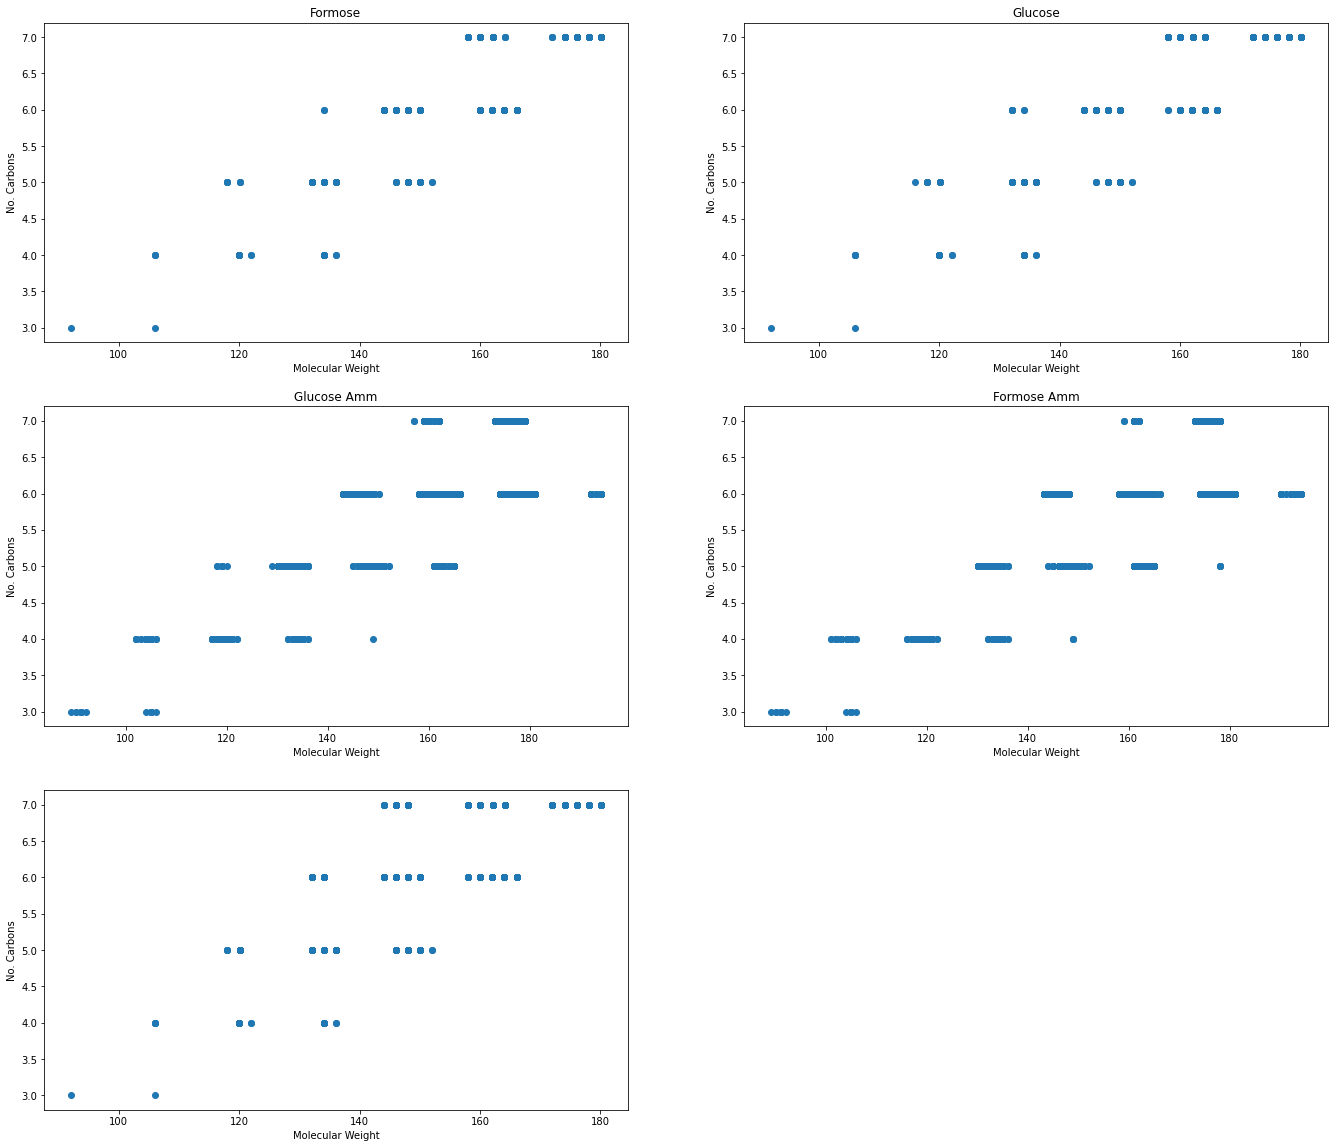

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (23,20), squeeze=False) 
descriptor_subplotter('No. Carbons')

In [43]:
def descriptor_plotter():
    plt.figure(figsize=(15,10))
    network = input('Which network would you like to plot?')
    descriptor = input('Which descriptor would you like to plot?')
    num_generations = int(input('How many generations does the network have?'))
    
    data = pd.read_csv(f'MatchedDataNoStereo/{network}/{network}Descriptors.tsv', sep='\t')
    generation_data = np.zeros(len(data['Generation']))
    for i in range(len(generation_data)):
        dummy = split(data['Generation'][i])
        generation_data[i] = int(dummy[-1])
    

    generation_markers = np.zeros(num_generations)
    for i in range(len(generation_data)):
        for j in range(len(generation_markers)):
            if (generation_data[i]-1) == j and i > generation_markers[j]:
                generation_markers[j] = i
    print(generation_markers)
    #return(generation_data)
    if generation_markers[0] == 0:
        plt.scatter(data['Molecular Weight'][0], data[descriptor][0])
    else:
        plt.scatter(data['Molecular Weight'][:int(generation_markers[0])], data[descriptor][:int(generation_markers[0])])
    for i in range(num_generations-1):
        plt.scatter(data['Molecular Weight'][(int(generation_markers[i])+1):int(generation_markers[i+1])], data[descriptor][(int(generation_markers[i])+1):int(generation_markers[i+1])])
    
    plt.rc('font', size=20)  
    plt.xlabel('Molecular Weight')
    plt.ylabel(f'{descriptor}')
    plt.title(f'{descriptor} vs Molecular Weight for {network}')
    
    if num_generations == 4:
        plt.legend(['G1', 'G2', 'G3', 'G4'])
    elif num_generations == 5:
        plt.legend(['G1', 'G2', 'G3', 'G4', 'G5'])
    else: 
        plt.legend(['G1', 'G2', 'G3', 'G4', 'G5', 'G6'])

Which network would you like to plot?PyruvicAcid
Which descriptor would you like to plot?ESOL
How many generations does the network have?6
[0.000e+00 1.000e+00 2.200e+01 1.790e+02 1.309e+03 4.970e+03]


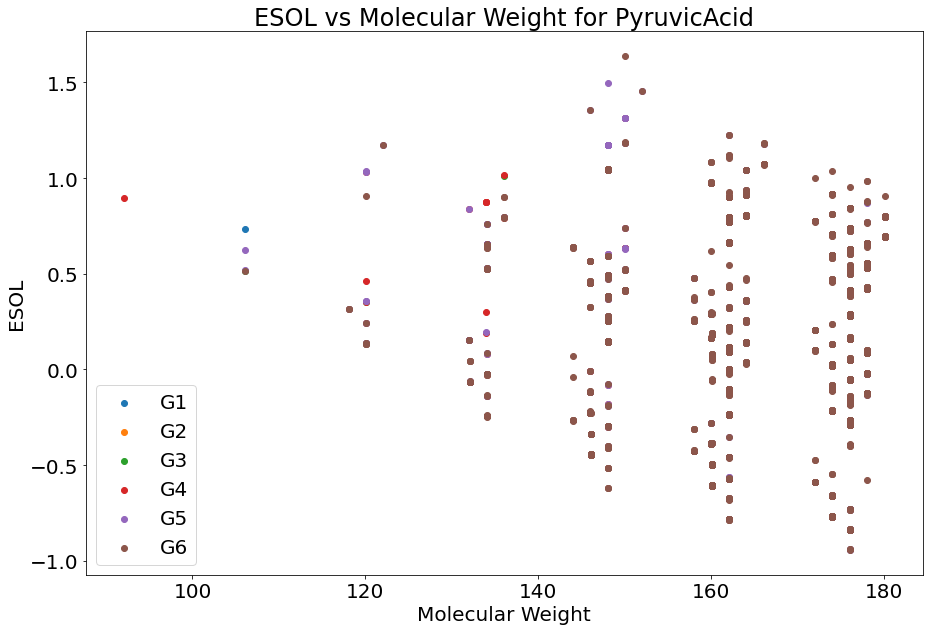

In [48]:
descriptor_plotter()

In [70]:
def van_krevelen():
    plt.figure(figsize=(15,10))
    network = input('Which network would you like to plot?')
    num_generations = int(input('How many generations does the network have?'))
    
    data = pd.read_csv(f'MatchedDataNoStereo/{network}/{network}Descriptors.tsv', sep='\t')
    data['O/C'] = data['No. Oxygens'] / data['No. Carbons']
    data['H/C'] = data['No. Hydrogens'] / data['No. Carbons']
    
    
    generation_data = np.zeros(len(data['Generation']))
    for i in range(len(generation_data)):
        dummy = split(data['Generation'][i])
        generation_data[i] = int(dummy[-1])

    generation_markers = np.zeros(num_generations)
    for i in range(len(generation_data)):
        for j in range(len(generation_markers)):
            if (generation_data[i]-1) == j and i > generation_markers[j]:
                generation_markers[j] = i
    print(generation_markers)
    #return(generation_data)
    if generation_markers[0] == 0:
        plt.scatter(data['O/C'][0], data['H/C'][0])
    else:
        plt.scatter(data['O/C'][:int(generation_markers[0])], data['H/C'][:int(generation_markers[0])])
    for i in range(num_generations-1):
        plt.scatter(data['O/C'][(int(generation_markers[i])+1):int(generation_markers[i+1])], data['H/C'][(int(generation_markers[i])+1):int(generation_markers[i+1])])
    
    plt.rc('font', size=20)  
    plt.xlabel('O/C')
    plt.ylabel('H/C')
    plt.title(f'Van Krevelen plot for {network}')
    
    if num_generations == 4:
        plt.legend(['G1', 'G2', 'G3', 'G4'])
    elif num_generations == 5:
        plt.legend(['G1', 'G2', 'G3', 'G4', 'G5'])
    else: 
        plt.legend(['G1', 'G2', 'G3', 'G4', 'G5', 'G6'])

Which network would you like to plot?PyruvicAcid
How many generations does the network have?6
[0.000e+00 1.000e+00 2.200e+01 1.790e+02 1.309e+03 4.970e+03]


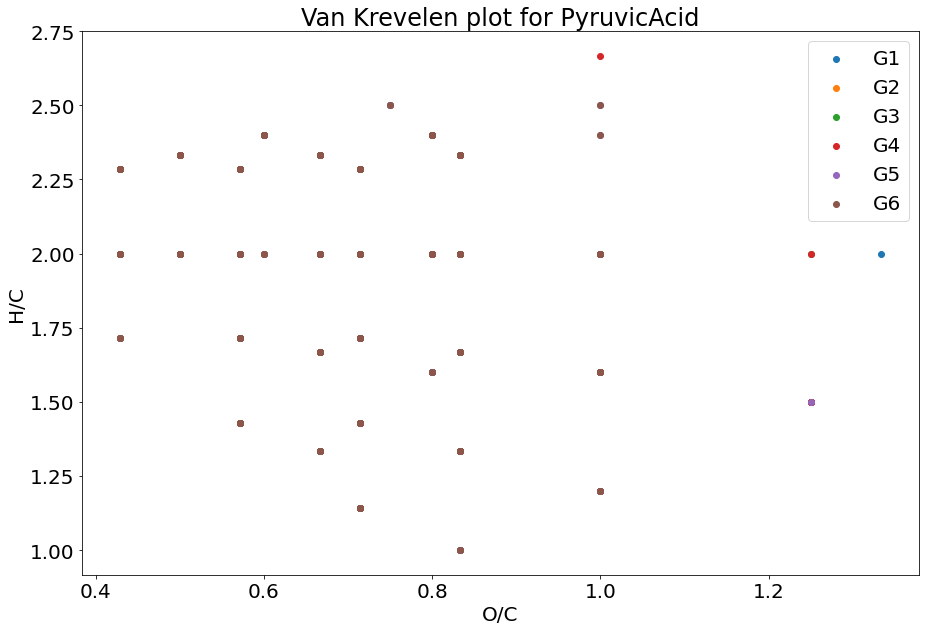

In [75]:
van_krevelen()

In [49]:
def het_atoms():
    plt.figure(figsize=(15,10))
    network = input('Which network would you like to plot?')
    num_generations = int(input('How many generations does the network have?'))
    
    data = pd.read_csv(f'MatchedDataNoStereo/{network}/{network}Descriptors.tsv', sep='\t')
    data['Heteroatoms/Carbon atoms'] = data['No. Heteroatoms'] / data['No. Carbons']
    
    
    generation_data = np.zeros(len(data['Generation']))
    for i in range(len(generation_data)):
        dummy = split(data['Generation'][i])
        generation_data[i] = int(dummy[-1])

    generation_markers = np.zeros(num_generations)
    for i in range(len(generation_data)):
        for j in range(len(generation_markers)):
            if (generation_data[i]-1) == j and i > generation_markers[j]:
                generation_markers[j] = i
    print(generation_markers)
    #return(generation_data)
    if generation_markers[0] == 0:
        plt.scatter(data['Molecular Weight'][0], data['Heteroatoms/Carbon atoms'][0])
    else:
        plt.scatter(data['Molecular Weight'][:int(generation_markers[0])], data['Heteroatoms/Carbon atoms'][:int(generation_markers[0])])
    for i in range(num_generations-1):
        plt.scatter(data['Molecular Weight'][(int(generation_markers[i])+1):int(generation_markers[i+1])], data['Heteroatoms/Carbon atoms'][(int(generation_markers[i])+1):int(generation_markers[i+1])])
    
    plt.rc('font', size=20)  
    plt.xlabel('Molecular Weight')
    plt.ylabel('Heteroatoms/Carbon atoms')
    plt.title(f'Plot of heteroatoms/carbon atoms for {network}')
    
    if num_generations == 4:
        plt.legend(['G1', 'G2', 'G3', 'G4'])
    elif num_generations == 5:
        plt.legend(['G1', 'G2', 'G3', 'G4', 'G5'])
    else: 
        plt.legend(['G1', 'G2', 'G3', 'G4', 'G5', 'G6'])

Which network would you like to plot?PyruvicAcid
How many generations does the network have?6
[0.000e+00 1.000e+00 2.200e+01 1.790e+02 1.309e+03 4.970e+03]


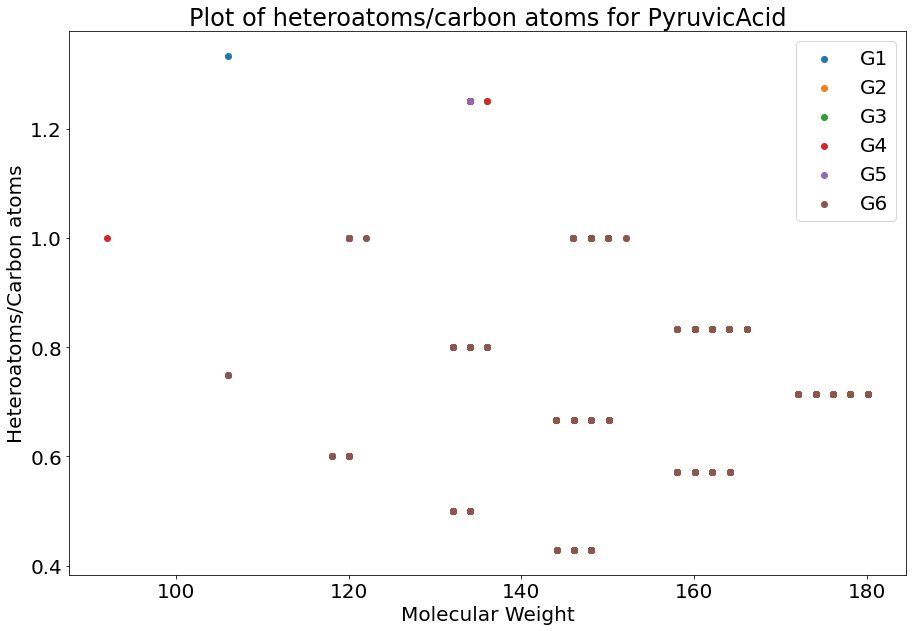

In [54]:
het_atoms()

In [78]:
def combine_descriptors(descriptors_file, minimised_file):
    descriptors = pd.read_csv(descriptors_file, sep='\t')
    minimised = pd.read_csv(minimised_file, sep='\t')
    
    descriptors['cLogP'] = minimised['cLogP']
    descriptors['cLogS'] = minimised['cLogS']
    descriptors['H-Acceptors'] = minimised['H-Acceptors']
    descriptors['H-Donors'] = minimised['H-Donors']
    descriptors['Polar Surface Area'] = minimised['Polar Surface Area']
    descriptors['Druglikeness'] = minimised['Druglikeness']
    
    descriptors.to_csv(r'c:\data\pandas.txt', header=None, index=None, sep='\t', mode='a') 
    return(descriptors)

In [85]:
#a = combine_descriptors('./MatchedDataNoStereo/GlucoseFinal/GlucoseFinalDescriptors.tsv', './MatchedDataNoStereo/GlucoseFinal/MinimisedGlucoseFinal.tsv')